# STA 208: Homework 3 - due Wednesday, May 22

### Data Section: ROC, PR curves (Logistic, LDA, SVM)

In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score, confusion_matrix, classification_report
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
Abalone = pd.read_csv('Abalone.csv')
Abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
Abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
Abalone.describe(include = 'all')    ## Note that without "include = 'all' " the variable "Sex" would not be described here...

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [5]:
Abalone["Rings"].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

In [6]:
# The feature "Rings" actually describes the age of the abalone (age = Rings + 1.5). We build two
# classes of Abalones "old" and "young" depending on whether "Rings" > 10 or not.

y = Abalone['Rings'].values
y = y>10
y = y.astype(int)
X = Abalone.drop(['Rings','Sex'],axis=1).values    # <=====.  we also drop 'Sex' here to avoid having to deal with
                                                   # acategorical variable; it is also not very informtive

So we will be predicting whether the Abalone is young or old. Now we split the data.  

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [11]:
X_train.shape

(2923, 7)

In [12]:
y_train[0:5]

array([0, 0, 0, 1, 1])

The exercises below include so-called PR-curves, not explicitely discussed in class. PR curves are similar to ROC curves, and they are also describing aspects of the performance of the classifier. PR curve are plots of TPR (recall) against 'precision'. For more details on PR curves, you might want to read [this post.](https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248)

__Exercise 2.1__ (10 pts) Perform logistic regression using Newton conjugate gradient (set the solver accordingly).  You should save the predicted probabilities, and save the roc and pr curves (using roc_curve and precision_recall_curve) computed using the test set.

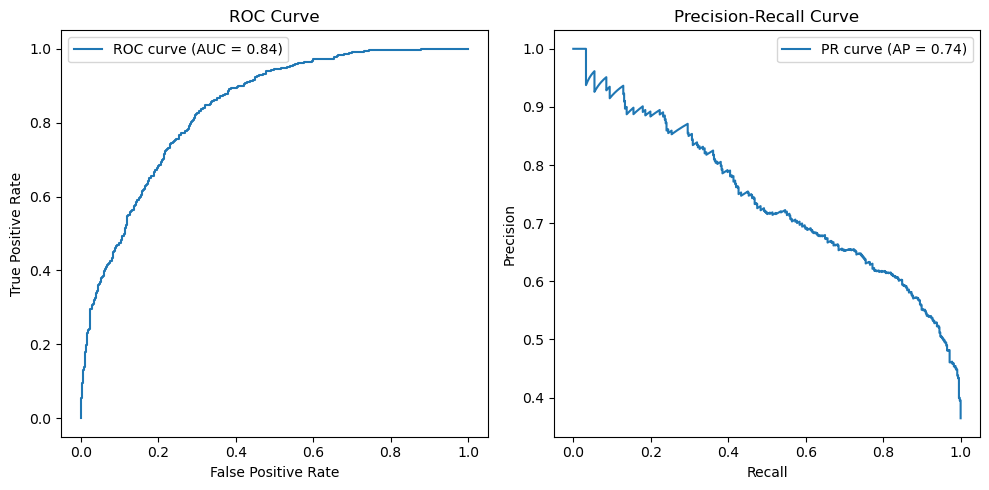

In [23]:
# Performing logistic regression using Newton conjugate gradient solver
log_reg = LogisticRegression(solver='newton-cg')
log_reg.fit(X_train, y_train)

# Saving the predicted probabilities
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Computing ROC curve and PR curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plotting ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plotting PR curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision_score(y_test, y_prob):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

__Exercise 2.2__ (10 pts) Do the same for linear discriminant analysis.

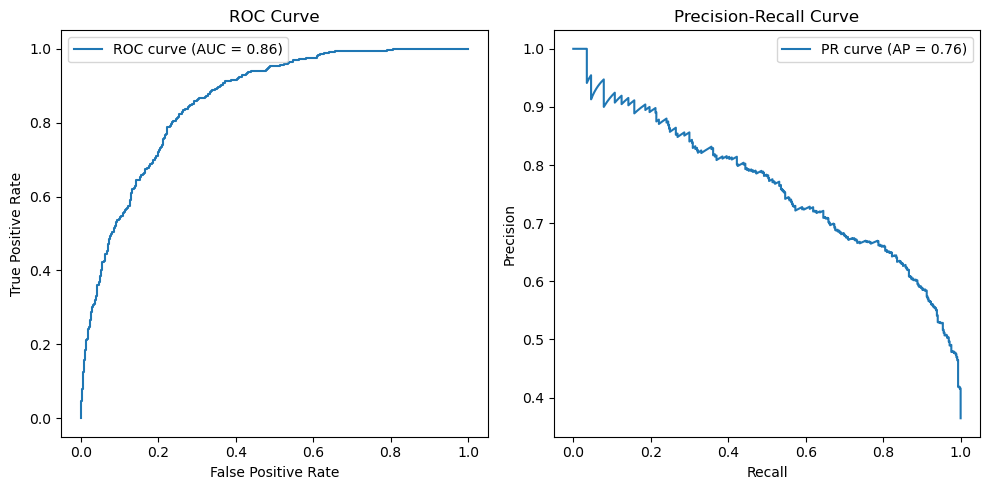

In [20]:
# Performing Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Saving the predicted probabilities
y_prob_lda = lda.predict_proba(X_test)[:, 1]

# Computing ROC curve and PR curve for LDA
fpr_lda, tpr_lda, _lda = roc_curve(y_test, y_prob_lda)
precision_lda, recall_lda, _lda = precision_recall_curve(y_test, y_prob_lda)

# Plotting ROC curve and PR curve for LDA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_lda, tpr_lda, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob_lda):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plotting PR curve for LDA
plt.subplot(1, 2, 2)
plt.plot(recall_lda, precision_lda, label=f'PR curve (AP = {average_precision_score(y_test, y_prob_lda):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

__Exercise 2.3__ (10 pts) Do the same for support vector machines.

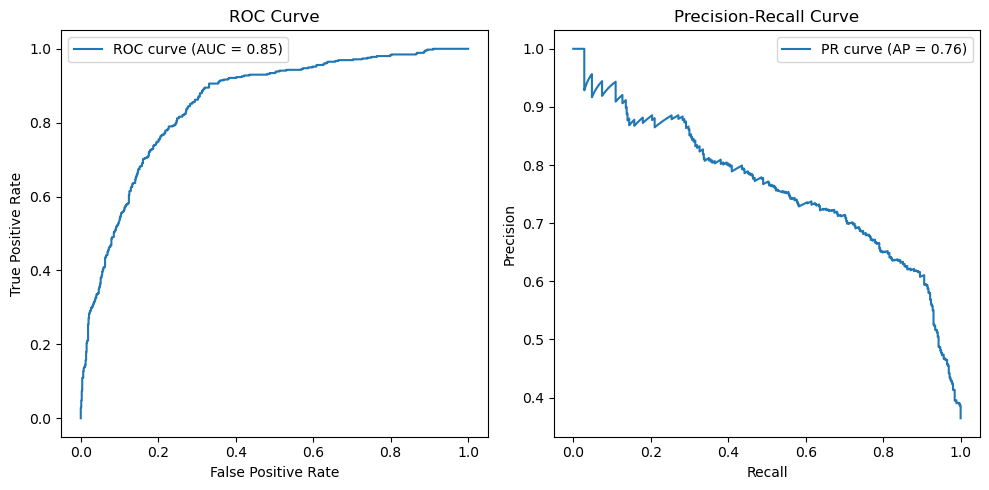

In [21]:
# Performing Support Vector Machine (SVM) with probability estimates
svm = SVC(probability=True, random_state=0)
svm.fit(X_train, y_train)

# Saving the predicted probabilities
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Computing ROC curve and PR curve for SVM
fpr_svm, tpr_svm, _svm = roc_curve(y_test, y_prob_svm)
precision_svm, recall_svm, _svm = precision_recall_curve(y_test, y_prob_svm)

# Plotting ROC curve and PR curve for SVM
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_svm, tpr_svm, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob_svm):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plotting PR curve for SVM
plt.subplot(1, 2, 2)
plt.plot(recall_svm, precision_svm, label=f'PR curve (AP = {average_precision_score(y_test, y_prob_svm):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

__Exercise 2.4__ (10 pts) Plot and compare the ROC and PR curves for the above methods.

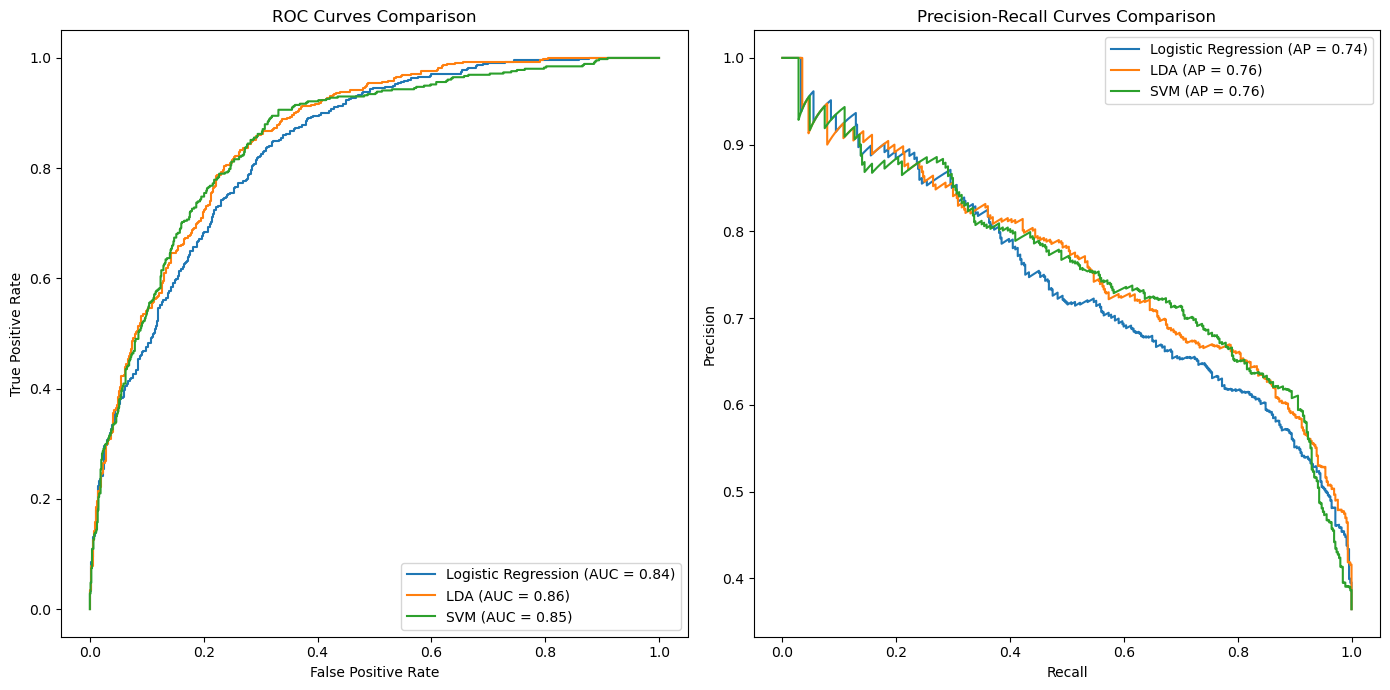

In [22]:
# Plotting and comparing ROC curves for Logistic Regression, LDA, and SVM
plt.figure(figsize=(14, 7))

# ROC Curves
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {roc_auc_score(y_test, y_prob_lda):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, y_prob_svm):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()

# PR Curves
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Logistic Regression (AP = {average_precision_score(y_test, y_prob):.2f})')
plt.plot(recall_lda, precision_lda, label=f'LDA (AP = {average_precision_score(y_test, y_prob_lda):.2f})')
plt.plot(recall_svm, precision_svm, label=f'SVM (AP = {average_precision_score(y_test, y_prob_svm):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Comparison')
plt.legend()

plt.tight_layout()
plt.show()

__Conclusion__:

The comparison of ROC and Precision-Recall (PR) curves for Logistic Regression, Linear Discriminant Analysis (LDA), and Support Vector Machines (SVM) provides a clear view of the performance differences among these models. The ROC curves, which plot the True Positive Rate (TPR) against the False Positive Rate (FPR), reveal that the LDA model has the highest Area Under the Curve (AUC) at 0.86, indicating superior performance in distinguishing between classes. In contrast, Logistic Regression and SVM have AUC values of 0.84 and 0.85, respectively.

The Precision-Recall (PR) curves further highlight the SVM model's effectiveness. These curves plot Precision against Recall, and the Average Precision (AP) serves as a summary measure. Both SVM and LDA model achieves the high AP of 0.76, outperforming Logistic Regression, which have AP values of 0.74. This indicates that the SVM and LDA models maintain better balance between precision and recall.

Overall, the LDA model demonstrates superior performance compared to both Logistic Regression and SVM in this classification task. Its higher AUC and AP values reflect its robustness in accurately classifying and balancing the performance metrics, making it the best choice among the evaluated models.